In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

In [48]:
X, y = make_moons(n_samples=1000, noise=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [49]:
print(X[:5])       # first 5 feature rows
print(y[:5])       # corresponding labels

[[-0.11166654  0.52022374]
 [ 1.14264982 -0.34257734]
 [ 0.79555796 -0.01144231]
 [ 0.11182668 -0.55193153]
 [-0.81646618  0.54399604]]
[1 1 1 1 0]


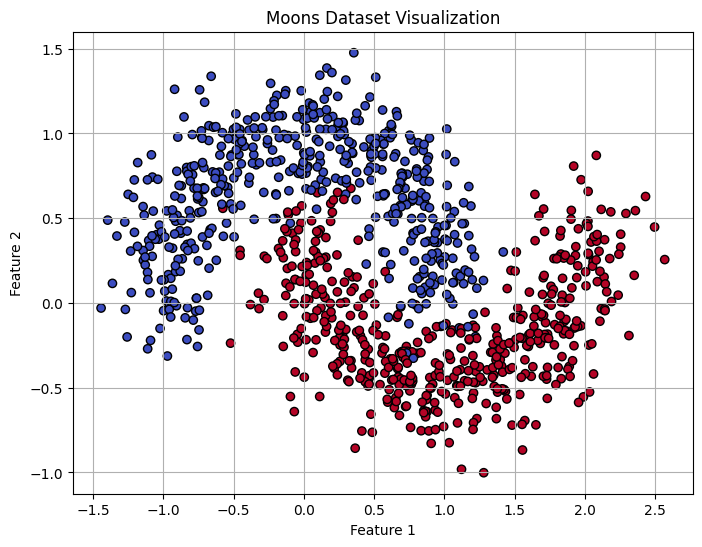

In [50]:
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')
plt.title("Moons Dataset Visualization")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()

In [51]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [52]:
model = Sequential()

model.add(Dense(10,activation='sigmoid',input_dim=2))
model.add(Dense(1,activation='sigmoid'))

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 41 (164.00 B)

 Trainable params: 41 (164.00 B)

 Non-trainable params: 0 (0.00 B)

In [53]:
# Set parameters to 0
model.get_weights()

[array([[-0.5419651 ,  0.47831374, -0.44168684, -0.39323565, -0.3341188 ,
         -0.50531983,  0.5040775 , -0.6340147 , -0.39002812, -0.44152516],
        [-0.36308482,  0.2679516 , -0.08421564,  0.05773985,  0.40406626,
         -0.12447345, -0.18617612, -0.18429989,  0.65837187, -0.43754277]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[-0.60118705],
        [ 0.05324459],
        [ 0.07744551],
        [-0.33289468],
        [ 0.3473248 ],
        [ 0.06970048],
        [ 0.501491  ],
        [ 0.25319654],
        [-0.31583375],
        [-0.37128305]], dtype=float32),
 array([0.], dtype=float32)]

In [54]:
initial_weights = model.get_weights()

In [55]:
initial_weights[0] = np.zeros(model.get_weights()[0].shape)
initial_weights[1] = np.zeros(model.get_weights()[1].shape)
initial_weights[2] = np.zeros(model.get_weights()[2].shape)
initial_weights[3] = np.zeros(model.get_weights()[3].shape)

In [56]:
model.set_weights(initial_weights)

In [57]:
model.get_weights()

[array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]], dtype=float32),
 array([0.], dtype=float32)]

In [58]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [59]:
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val))

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5070 - loss: 0.6933 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5307 - loss: 0.6928 - val_accuracy: 0.5000 - val_loss: 0.6930
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5425 - loss: 0.6922 - val_accuracy: 0.5000 - val_loss: 0.6928
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5243 - loss: 0.6924 - val_accuracy: 0.5000 - val_loss: 0.6924
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4809 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6919
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4947 - loss: 0.6918 - val_accuracy: 0.5000 - val_loss: 0.6904
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4993 - loss: 0.6903 - val_accuracy: 0.5000 - val_loss: 0.6885
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5108 - loss: 0.6871 - val_accuracy: 0.5000 - 

In [60]:
model.get_weights()

[array([[-1.0528157, -1.0528157, -1.0528157, -1.0528157, -1.0528157,
         -1.0528157, -1.0528157, -1.0528157, -1.0528157, -1.0528157],
        [ 2.5026093,  2.5026093,  2.5026093,  2.5026093,  2.5026093,
          2.5026093,  2.5026093,  2.5026093,  2.5026093,  2.5026093]],
       dtype=float32),
 array([-1.1486276, -1.1486276, -1.1486276, -1.1486276, -1.1486276,
        -1.1486276, -1.1486276, -1.1486276, -1.1486276, -1.1486276],
       dtype=float32),
 array([[-0.6098107],
        [-0.6098107],
        [-0.6098107],
        [-0.6098107],
        [-0.6098107],
        [-0.6098107],
        [-0.6098107],
        [-0.6098107],
        [-0.6098107],
        [-0.6098107]], dtype=float32),
 array([1.6604592], dtype=float32)]

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 9s 949us/step


<Axes: >

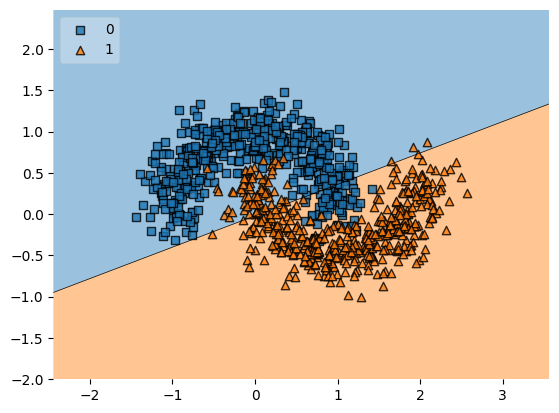

In [16]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'), clf=model, legend=2)

In [33]:
model2 = Sequential()

model2.add(Dense(10,activation='sigmoid',input_dim=2))
model2.add(Dense(1,activation='sigmoid'))

model2.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 41 (164.00 B)

 Trainable params: 41 (164.00 B)

 Non-trainable params: 0 (0.00 B)

In [34]:
# Set parameters to 0
model2.get_weights()

[array([[ 0.556493  , -0.52461547, -0.02130306,  0.4551366 , -0.0457204 ,
          0.6966297 ,  0.45361418, -0.4838834 ,  0.5284154 , -0.20575416],
        [ 0.40926844, -0.20505267,  0.2532931 ,  0.5012081 ,  0.11150807,
          0.12630773,  0.12769735, -0.6329671 ,  0.12087059,  0.04304123]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[-0.16445994],
        [-0.5003699 ],
        [-0.24153149],
        [-0.67804   ],
        [-0.24178225],
        [ 0.49407524],
        [-0.23747665],
        [-0.18571627],
        [ 0.34460336],
        [ 0.6985212 ]], dtype=float32),
 array([0.], dtype=float32)]

In [35]:
initial_weights = model2.get_weights()

In [36]:
initial_weights[0] = np.ones(model2.get_weights()[0].shape)*0.5
initial_weights[1] = np.ones(model2.get_weights()[1].shape)*0.5
initial_weights[2] = np.ones(model2.get_weights()[2].shape)*0.5
initial_weights[3] = np.ones(model2.get_weights()[3].shape)*0.5

In [37]:
model2.set_weights(initial_weights)

In [38]:
model2.get_weights()

[array([[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
        [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]], dtype=float32),
 array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5], dtype=float32),
 array([[0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5]], dtype=float32),
 array([0.5], dtype=float32)]

In [39]:
model2.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [42]:
history2 = model2.fit(X,y,epochs=100,validation_data=(X_val, y_val))

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7981 - loss: 0.5036 - val_accuracy: 0.7850 - val_loss: 0.4949
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8004 - loss: 0.5006 - val_accuracy: 0.7850 - val_loss: 0.4892
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8044 - loss: 0.4980 - val_accuracy: 0.7900 - val_loss: 0.4833
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7899 - loss: 0.5054 - val_accuracy: 0.7850 - val_loss: 0.4775
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8017 - loss: 0.4842 - val_accuracy: 0.7950 - val_loss: 0.4717
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7861 - loss: 0.4958 - val_accuracy: 0.7950 - val_loss: 0.4659
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7801 - loss: 0.4939 - val_accuracy: 0.7950 - val_loss: 0.4602
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8068 - loss: 0.4723 - val_accuracy: 0.7950 - v

In [43]:
model2.get_weights()

[array([[ 0.84604585,  0.84604585,  0.84604585,  0.84604585,  0.84604585,
          0.84604585,  0.84604585,  0.84604585,  0.84604585,  0.84604585],
        [-2.847984  , -2.847984  , -2.847984  , -2.847984  , -2.847984  ,
         -2.847984  , -2.847984  , -2.847984  , -2.847984  , -2.847984  ]],
       dtype=float32),
 array([-0.85088736, -0.85088736, -0.85088736, -0.85088736, -0.85088736,
        -0.85088736, -0.85088736, -0.85088736, -0.85088736, -0.85088736],
       dtype=float32),
 array([[0.7997094],
        [0.7997094],
        [0.7997094],
        [0.7997094],
        [0.7997094],
        [0.7997094],
        [0.7997094],
        [0.7997094],
        [0.7997094],
        [0.7997094]], dtype=float32),
 array([-2.2931972], dtype=float32)]

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step


<Axes: >

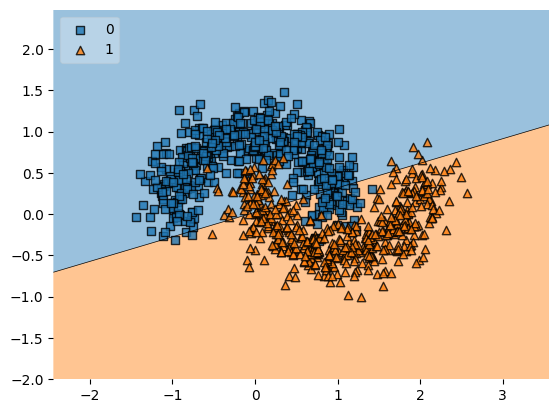

In [44]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'), clf=model2, legend=2)